# constant and variable Tensors

In [5]:
# 학습이 필요없는 객체 => immutable
# 학습이 필요한 weight and bias => mutable 

2.12.0


In [12]:
import tensorflow as tf
import numpy as np

t1 = tf.Variable([1,2,3]) # 파라미터 역할을 해줌
t2 = tf.constant([1,2,3]) # 데이터 셋 안에 들어있는 것은 constant tensor 

print(type(t1), sep='\n') # mutable 
print(type(t2)) # immutable

<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [14]:
test_list = [1,2,3]
test_np = np.array([1,2,3])

print(type(test_list))
print(type(test_np))

t1 = tf.constant(test_list)
t2 = tf.constant(test_np)

print(type(t1))
print(type(t2))



<class 'list'>
<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [15]:
# resource variable
test_list = [1,2,3]
test_np = np.array([1,2,3])

t1 = tf.Variable(test_list)
t2 = tf.Variable(test_np)

print(type(t1))
print(type(t2))



<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>


In [23]:
t1 = tf.constant(test_list)
t2 = tf.Variable(test_list)

t3 = tf.constant(t2)

t1 = tf.convert_to_tensor(test_list)
t2 = tf.convert_to_tensor(test_np) # advanced 된 테크닉이 필요할 때 쓰임. 
print(type(t1))
print(type(t2))



<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [24]:
test_list1 = [10,20,30]
test_list2 = [1,2,3]

t1 = tf.constant(test_list1) # from dataset
t2 = tf.Variable(test_list2) # weight and bias 

print(type(t1 + t2)) # => EagerTensor

<class 'tensorflow.python.framework.ops.EagerTensor'>


# Making Tensors with API

In [37]:
import tensorflow as tf
import numpy as np

test_list = [1,1,1,1,1,1]

t1 = tf.constant(test_list)
print(t1)

t2 = tf.ones(shape=(100,2))
print(t2.shape)

t3 = tf.ones(shape=(128,128,3))
print(t3.shape)

t4 = tf.zeros(shape=(128,128,3))
print(t4.shape)

t5 = 3*tf.ones(shape=(128,128,3))
print(t5.shape) 

tf.Tensor([1 1 1 1 1 1], shape=(6,), dtype=int32)
(100, 2)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [41]:
test_list = [[1,2,3], [4,5,6]]

t1 = tf.Variable(test_list)
print(t1)

t2 = tf.ones_like(t1)
print(t2)

t3 = tf.zeros_like(t1)
print(t3)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>
tf.Tensor(
[[1 1 1]
 [1 1 1]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[0 0 0]
 [0 0 0]], shape=(2, 3), dtype=int32)


In [49]:
import tensorflow as tf
import numpy as np
np.random.seed(1)
tf.random.set_seed(0) # tf.random.set_seed()

t1 = tf.random.normal(shape=(3,3))
print(t1)

tf.Tensor(
[[ 1.5110626   0.42292204 -0.41969493]
 [-1.0360372  -1.2368279   0.47027302]
 [-0.01397489  1.1888583   0.60253334]], shape=(3, 3), dtype=float32)


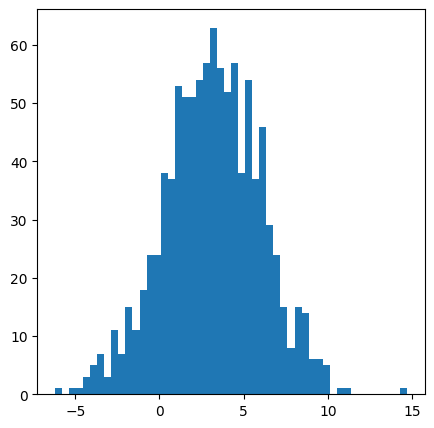

In [56]:
import matplotlib.pyplot as plt

t2 = tf.random.normal(mean=3, stddev=3, shape=(1000,))

fig, ax = plt.subplots(figsize=(5,5))
ax.hist(t2.numpy(), bins=50)
plt.show()

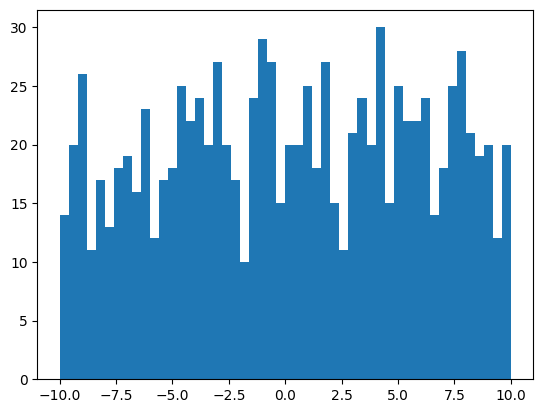

In [57]:
t2 = tf.random.uniform(shape=(1000,), minval=-10, maxval=10)
plt.hist(t2.numpy(), bins=50)
plt.show()

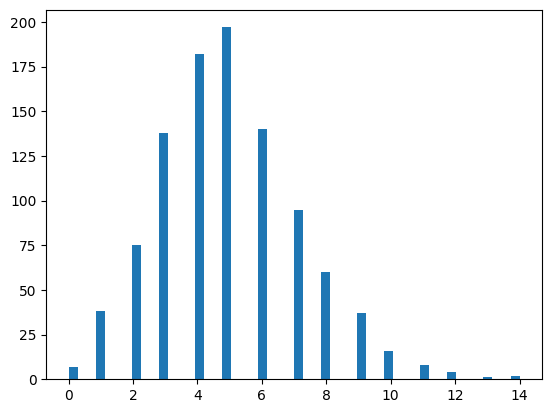

In [58]:
t2 = tf.random.poisson(shape=(1000,), lam=5)
plt.hist(t2.numpy(), bins=50)
plt.show()

In [60]:
t1 = tf.random.normal(shape=(128,128,3))
print("shape : ", t1.shape)
print("dtype : ", t1.dtype)


shape :  (128, 128, 3)
dtype :  <dtype: 'float32'>


In [61]:
test_np = np.random.normal(0,1,size=(100,))
print(test_np.dtype)

float64


In [64]:
test_np = np.random.randint(-10,10,size=(100,))
print(test_np.dtype)

t1 = tf.constant(test_np, dtype=tf.float32)
print(t1.shape)

int64
(100,)


# Tensor operations

In [67]:
import tensorflow as tf
import numpy as np

t1 = tf.constant([1,2,3])
t2 = tf.constant([10,20,30])

print(t1 + t2)

# 전부 element-wise로 연산이 됨. 
# dot product => matmul

tf.Tensor([11 22 33], shape=(3,), dtype=int32)
[1, 2, 3, 10, 20, 30]


In [78]:
# braodcasting 
t1 = tf.random.normal(shape=(3,1), mean=0, stddev=5)
t2 = tf.random.normal(shape=(1,4), mean=0, stddev=5)

t1 = tf.cast(t1, dtype=tf.int16) # dtype을 바꿔줌
t2 = tf.cast(t2, dtype=tf.int16)

t3 = t1 + t2

print(t1.numpy(), '\n')
print(t2.numpy(), '\n')
print(t3.numpy(), '\n')



[[-2]
 [ 2]
 [ 0]] 

[[-3  6  2 -1]] 

[[-5  4  0 -3]
 [-1  8  4  1]
 [-3  6  2 -1]] 



In [79]:
t1 = tf.random.normal(shape=(3,4), mean=0, stddev=5)
t1 = tf.cast(t1, dtype=tf.int16)

# tf.reduce_sum
# tf.reduce_prod

# tf.reduce_max
# tf.reduce_min

# tf.reduce_mean
# tf.reduce_std
# tf.reduce_variance

# tf.reduce_all
# tf.reduce_any

[[-1  0 -3  2]
 [-5 -6 -2  4]
 [ 0 -3 -1  2]]


In [80]:
# reduce_sum
t2 = tf.reduce_sum(t1)
print(t1.numpy())
print(t2.numpy())

[[-1  0 -3  2]
 [-5 -6 -2  4]
 [ 0 -3 -1  2]]
-13


In [86]:
t2 = tf.reduce_sum(t1, axis=0)
# print(t2.numpy())

t3 = tf.reduce_sum(t1, axis=1)
# print(t3.numpy())

temp_tf = tf.random.normal(shape=(3,4,3), mean=0, stddev=5)
print(tf.reduce_sum(temp_tf, axis=-1).shape)


(3, 4)


# Gradient Tape in Tensorflow

In [91]:
import tensorflow as tf
import matplotlib.pyplot as plt

# tf.GradientTape()
# backpropagation이 진행될 때 
# forward propagation에서 진행된 값들이 저장되있을 필요가 있다.
# ==> forward propagation이 진행될 때 그 값들을 테이프로 저장해 놓는다. 
# ==> weight, bias 등등 모두 저장해 놓음

t1 = tf.Variable([1,2,3], dtype=tf.float32)
t2 = tf.Variable([10,20,30], dtype=tf.float32)

with tf.GradientTape() as tape:
    t3 = t1 * t2 # 여기서 forward propagation이 일어남. 

gradients = tape.gradient(t3, [t1, t2]) # t3에 대하여 t1, t2 편미분 한 것을 가져와라
print(type(gradients)) # 편미분 값을 리스트로 저장을 해놓았다가 가져올 수 있음. 

print('dt1: ', gradients[0])
print('dt2: ', gradients[1])

<class 'list'>
dt1:  tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
dt2:  tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


In [92]:
t1 = tf.Variable([1,2,3], dtype=tf.float32)
t2 = tf.Variable([10,20,30], dtype=tf.float32)

with tf.GradientTape() as tape:
    t3 = t1 * t2 
    t4 = t3 + t2

gradients = tape.gradient(t4, [t1, t2, t3]) 
print(type(gradients)) 

print('dt1: ', gradients[0])
print('dt2: ', gradients[1])
print('dt3: ', gradients[2]) 

<class 'list'>
dt1:  tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
dt2:  tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)
dt3:  tf.Tensor([1. 1. 1.], shape=(3,), dtype=float32)


In [94]:
t1 = tf.constant([1,2,3], dtype=tf.float32)
t2 = tf.Variable([10,20,30], dtype=tf.float32)

with tf.GradientTape() as tape:
    t3 = t1 * t2 

gradients = tape.gradient(t3, [t1, t2]) 
print(type(gradients)) 

print('dt1: ', gradients[0]) # constant는 gradient가 필요없는 값. 
print('dt2: ', gradients[1])

<class 'list'>
dt1:  None
dt2:  tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


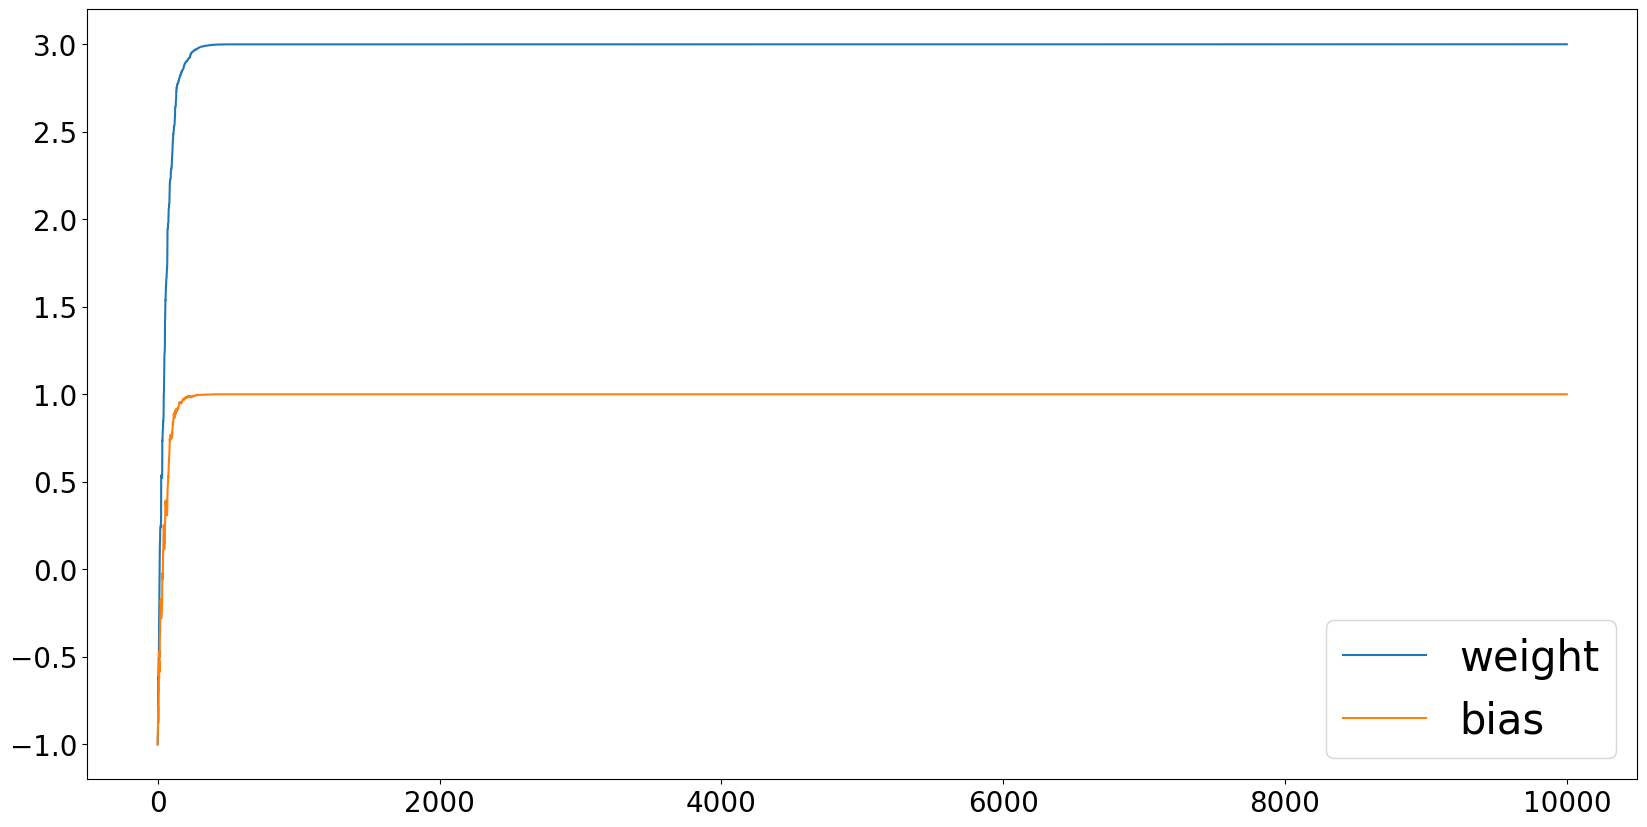

In [102]:
x_data = tf.random.normal(shape=(1000,), dtype=tf.float32)
y_data = 3*x_data + 1 # y = 3x + 1 노이즈 추가 X

w = tf.Variable(-1.)
b = tf.Variable(-1.)

learning_rate = 0.01
epochs = 10

w_trace, b_trace = list(), list()
for epoch in range(epochs):
    for x,y in zip(x_data, y_data):
        with tf.GradientTape() as tape: # 이 부분 잘 기억해놓기. 
            prediction = w*x + b # model 
            loss = (prediction - y)**2

        gradients = tape.gradient(loss, [w,b]) # loss에 대하여 weight, bias를 편미분한 값을 가져오기. 

        w_trace.append(w.numpy())
        b_trace.append(b.numpy())

        w = tf.Variable(w - learning_rate*gradients[0])
        b = tf.Variable(b - learning_rate*gradients[1])

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(w_trace, label='weight')
ax.plot(b_trace, label='bias')

ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
plt.show()


# Model Implementation

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

x_train = tf.random.normal(shape=(1000,1), dtype=tf.float32)
y_train = 3*x_train + 1 + 0.2*tf.random.normal(shape=(1000,1), dtype=tf.float32)


x_test = tf.random.normal(shape=(300,1), dtype=tf.float32)
y_test = 3*x_test + 1 + 0.2*tf.random.normal(shape=(300,1), dtype=tf.float32)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, 
                          activation='linear')
])

model.compile(loss='mean_squared_error', # forward propagation, backpropagation 둘다 한번에 됨.
              optimizer='SGD') 

## model compile하는 두번째 방법
# model.compile(
#     loss=tf.keras.losses.mse, 
#     optimizer=tf.keras.optimizers.SGD(),
# )

model.fit(x_train, y_train, epochs=50, verbose=2) # 2차원으로 만들어야지 돌아감..
model.evaluate(x_test, y_test, verbose=2) # test set에 대한 evaluate


# fig,ax = plt.subplots(figsize=(5,5))
# ax.scatter(x_train.numpy(), y_train.numpy())
# ax.tick_params(labelsize=20)
# ax.grid()

In [ ]:
# sequential

# model 만들기
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, 
                          activation='linear')
])

# loss와 optimizer 만들어주기
model.compile(loss='mean_squared_error', 
              optimizer='SGD') 

# fit & predict 
model.fit(x_train, y_train, epochs=50, verbose=2) # 2차원으로 만들어야지 돌아감..
model.evaluate(x_test, y_test, verbose=2)

In [136]:
# subclasssing
import tensorflow as tf
import matplotlib.pyplot as plt
from termcolor import colored

x_train = tf.random.normal(shape=(10,1), dtype=tf.float32)
y_train = 3*x_train + 1 + 0.2*tf.random.normal(shape=(10,1), dtype=tf.float32)


x_test = tf.random.normal(shape=(30,1), dtype=tf.float32)
y_test = 3*x_test + 1 + 0.2*tf.random.normal(shape=(30,1), dtype=tf.float32)

# modeling
class LinearPredictor(tf.keras.Model): # Model 상속을 받음. 
    def __init__(self):
        super(LinearPredictor, self).__init__()

        self.d1 = tf.keras.layers.Dense(units=1, 
                                        activation='linear')
        
    def call(self, x): # 실행시키는 코드
        x = self.d1(x)
        return x
        
EPOCHS = 10
LR = 0.01

# instantiation learning objects
model = LinearPredictor()

loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate = LR)

# learning
for epoch in range(EPOCHS):
    for x,y in zip(x_train, y_train):
        x = tf.reshape(x, (1,1))
        with tf.GradientTape() as tape: # forward propagation
            prediction = model(x)
            loss = loss_object(y, prediction)

        # backpropagation
        gradients = tape.gradient(loss, model.trainable_variables) # weight, bias가 들어있음. 
        # parameter update
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    print(colored('Epoch:', 'red', 'on_white'), epoch+1)

    template = 'Train Loss : {:.4f}\n'
    print(template.format(loss))





Epoch: 1
Train Loss : 2.7452

Epoch: 2
Train Loss : 2.3659

Epoch: 3
Train Loss : 2.0240

Epoch: 4
Train Loss : 1.7229

Epoch: 5
Train Loss : 1.4622

Epoch: 6
Train Loss : 1.2394

Epoch: 7
Train Loss : 1.0508

Epoch: 8
Train Loss : 0.8923

Epoch: 9
Train Loss : 0.7597

Epoch: 10
Train Loss : 0.6492

